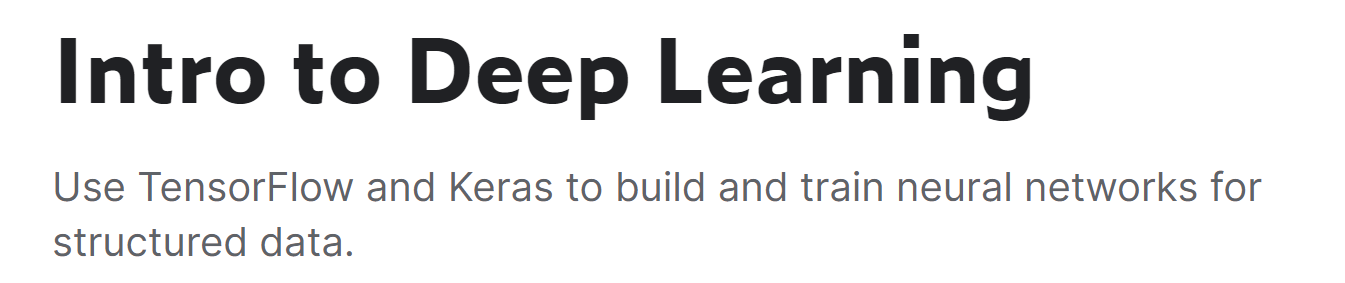

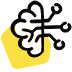

The bias enables the neuron to modify the output independently of its inputs.

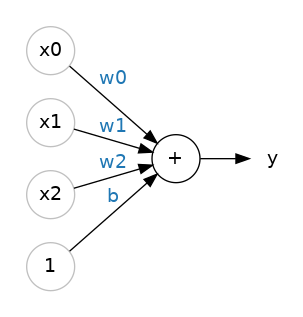

The formula for this neuron would be  **y = w0x0 + w1x1 + w2x2 + b**

In [1]:
# If you haven't installed this libraries yet

# !pip install tensorflow
# !pip install keras

In [2]:
# Linear model accepting three input features
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential(layers=[
    layers.Dense(units=1, input_shape=[3])])

# [The Sequential class](https://keras.io/api/models/sequential/)

# [Dense layer](https://keras.io/api/layers/core_layers/dense/)

With the first argument, **units**, we define how many outputs we want. In this case we are just predicting 'calories', so we'll use units=1.

With the second argument, **input_shape**, we tell Keras the dimensions of the inputs. Setting input_shape=[3] ensures the model will accept three features as input ('sugars', 'fiber', and 'protein').

# Layers

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer.

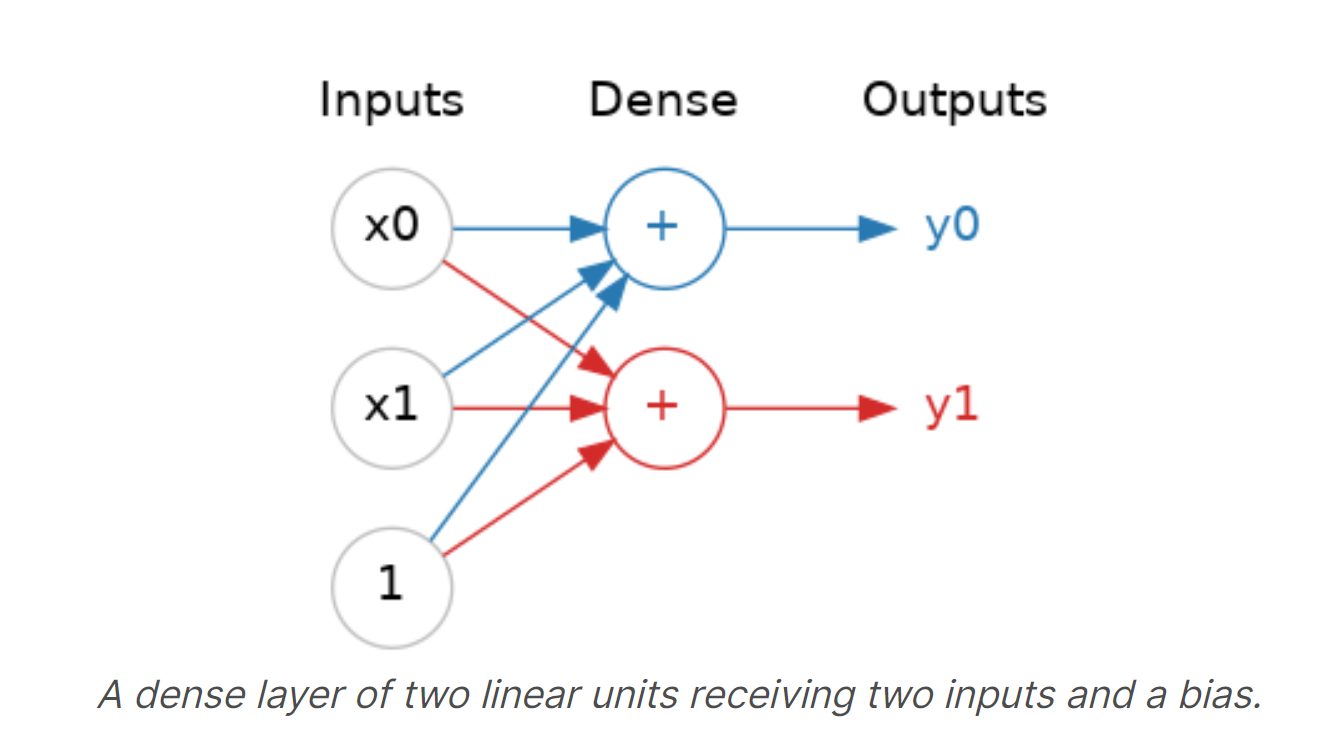

Without activation functions, neural networks can only learn linear relationships. In order to fit curves, we'll need to use activation functions.

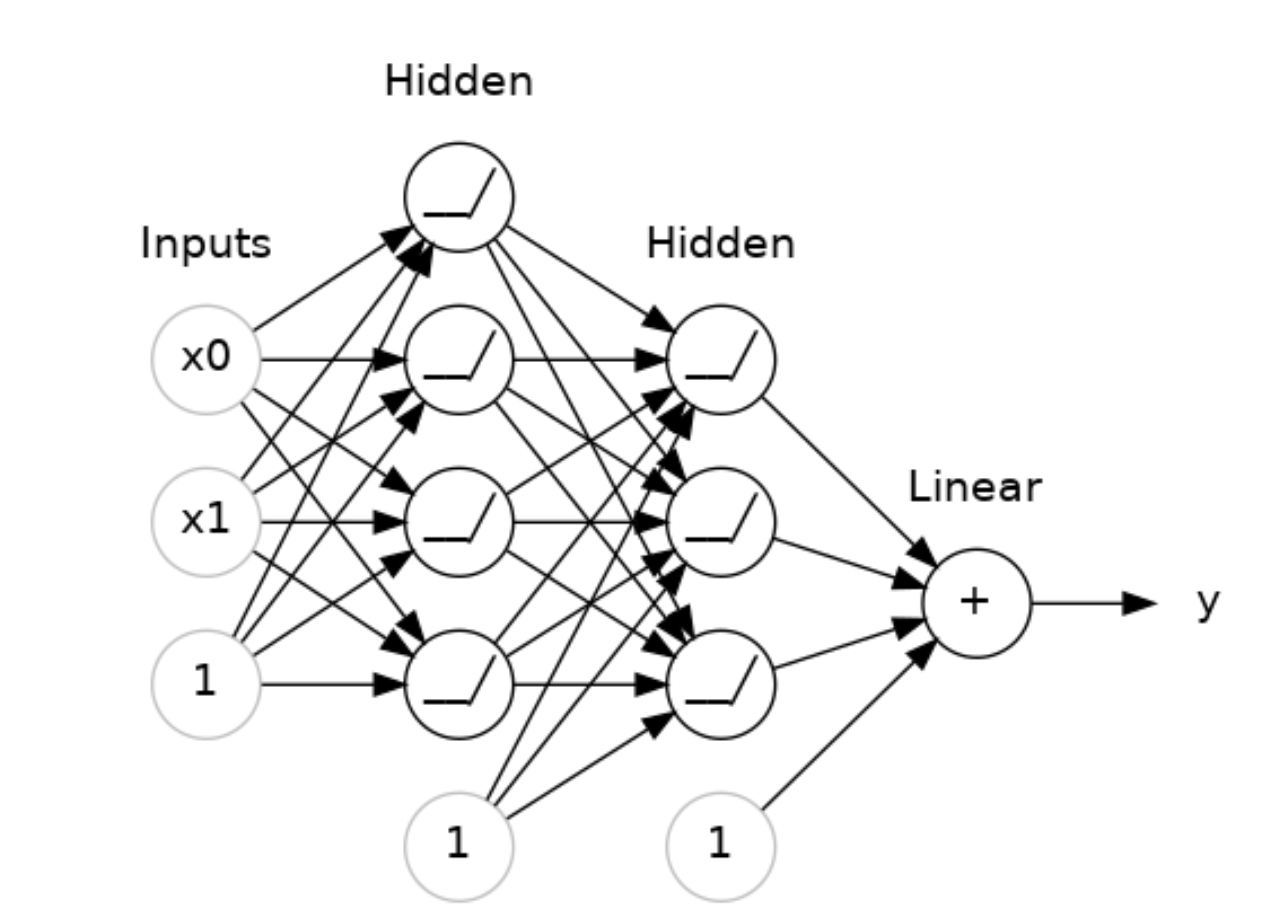

*A stack of dense layers makes a "fully-connected" network.*

In [3]:
# Building Sequential Models

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    layers.Dense(units=1)
])

In [4]:
# Adding the loss and Optimizer
model.compile(
    optimizer='adam',
    loss='mae'
)

In [5]:
# Add early stopping using callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,  # how many epochs to wait before stopping
    restore_best_weights=True
)

These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." 

# Overfitting and underfitting

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

red_wine = pd.read_csv('winequality-red.csv')

# Create training and validation splits
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

# Scale to [0, 1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [7]:
# Build the model
from tensorflow import keras
from tensorflow.keras import layers, callbacks


# Set earlystopping of the model fitting
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=20,  # how many epochs to wait before stopping
    restore_best_weights=True
)

# Build model architecture
model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mae')

Minimum validation loss: 0.4691276550292969
Minimum validation loss: 0.4691276550292969


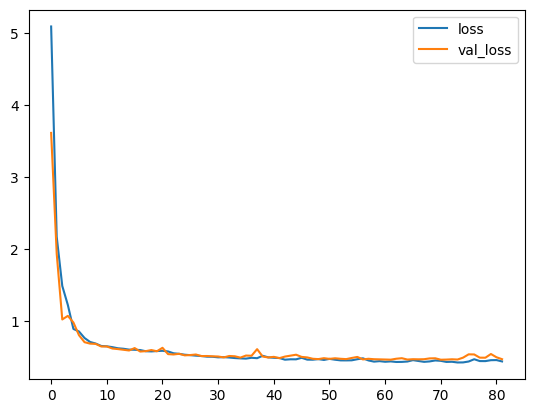

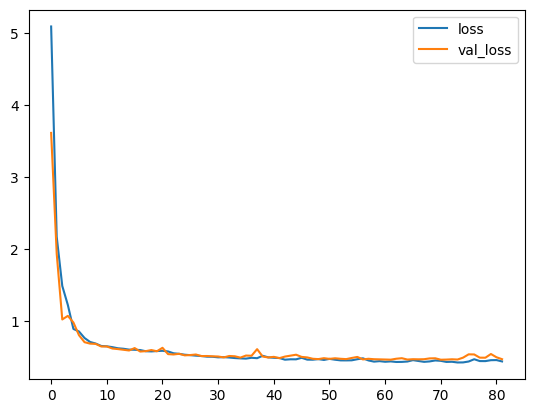

In [8]:
# Visualize model fitting
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],  # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
# history.history -> {'loss': [2.4234085083007812], 'val_loss': [1.6612811088562012]}
history_df.loc[:, ['loss', 'val_loss']].plot();
print(f'Minimum validation loss: {history_df.val_loss.min()}')

[EarlyStopping](https://keras.io/api/callbacks/early_stopping/)

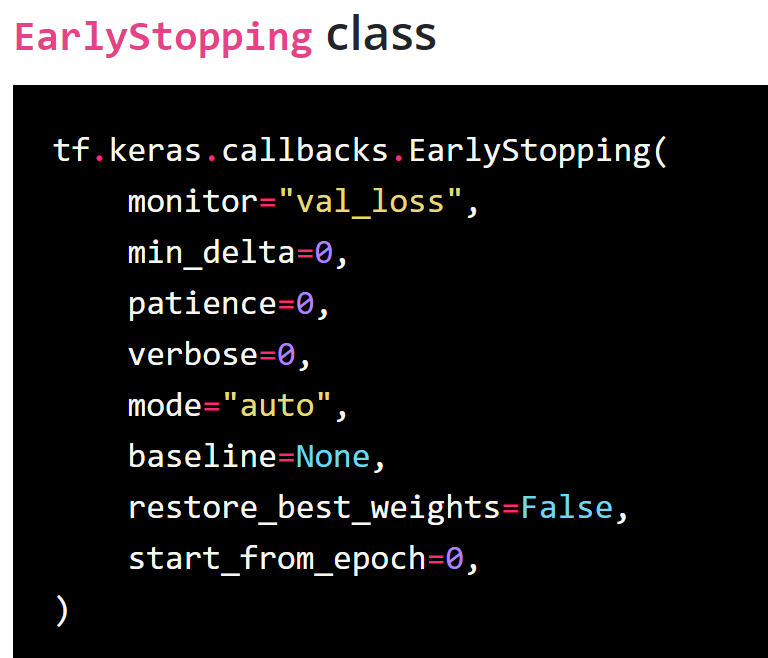

# 2D Convolutions
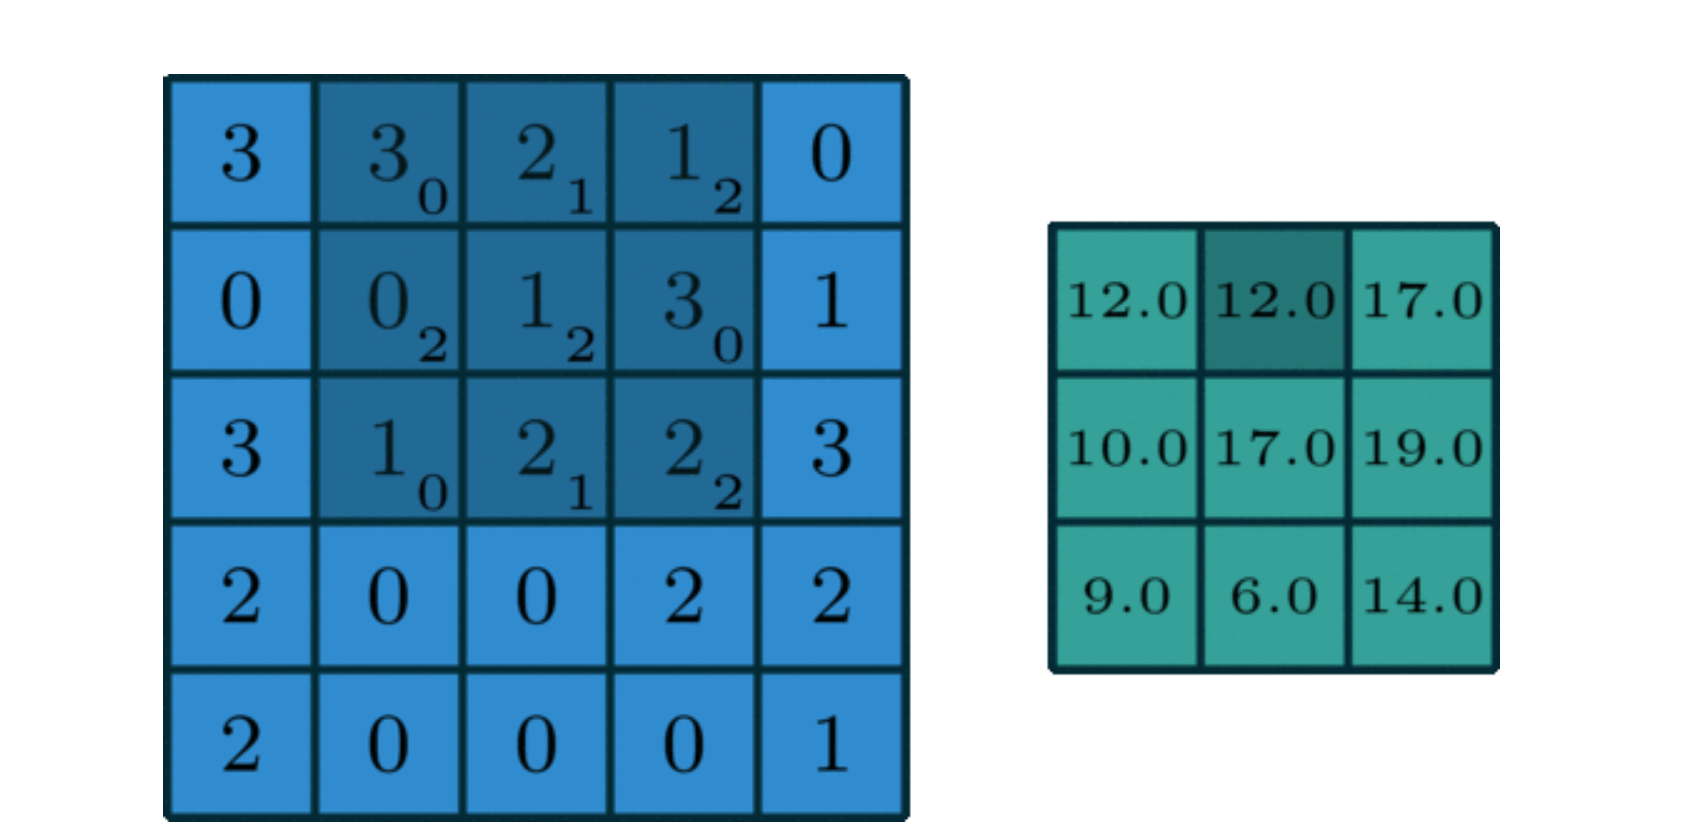

# Using Dropout and Batch Normalization

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [10]:
model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256, 
    epochs=100,
    verbose=0
)

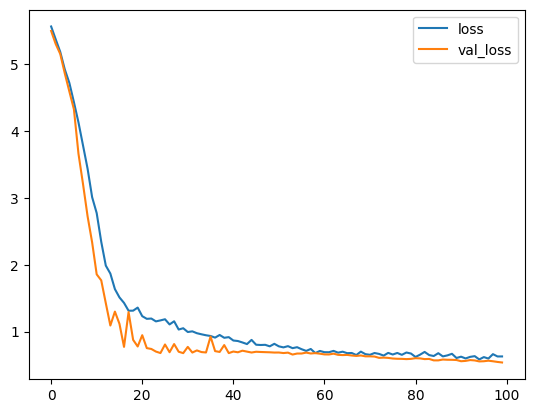

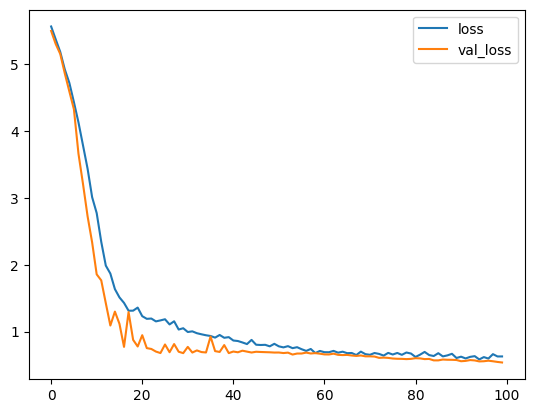

In [11]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();